In [147]:
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import keras
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import tensorflow as tf

from utils import *
from autoencoders import *

In [148]:
keras.backend.clear_session()
print("GPUs Available: ", tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


In [149]:
w_length = 200
w_increment = 100

path = 'D:\Documentos\Datasets\Grabaciones 1'

raw_data = loadRawData(path, w_length, w_increment)

AT_FE1.txt
AT_FE2.txt
AT_FE3.txt
AT_FE4.txt
AT_FE_EC1.txt
AT_FE_EC2.txt
AT_FE_FC1.txt
AT_FE_FC2.txt
AT_PS1.txt
AT_PS2.txt
AT_PS3.txt
AT_PS4.txt
AT_PS5.txt
AT_PS_PC1.txt
AT_PS_PC2.txt
AT_PS_SC1.txt
AT_PS_SC2.txt
JT_FE1.txt
JT_FE2.txt
JT_FE_EC1.txt
JT_FE_EC2.txt
JT_FE_FC1.txt
JT_FE_FC2.txt
JT_PS1.txt
JT_PS2.txt
JT_PS_PC1.txt
JT_PS_PC2.txt
JT_PS_SC1.txt
JT_PS_SC2.txt
SV_FE1.txt
SV_FE2.txt
SV_FE3.txt
SV_FE4.txt
SV_FE_EC1.txt
SV_FE_EC2.txt
SV_FE_FC1.txt
SV_FE_FC2.txt
SV_PS1.txt
SV_PS2.txt
SV_PS_PC1.txt
SV_PS_PC2.txt
SV_PS_SC1.txt
SV_PS_SC2.txt
Y_FE1.txt
Y_FE2.txt
Y_FE_EC1.txt
Y_FE_EC2.txt
Y_FE_FC1.txt
Y_FE_FC2.txt
Y_PS1.txt
Y_PS2.txt
Y_PS_PC1.txt
Y_PS_PC2.txt
Y_PS_SC1.txt
Y_PS_SC2.txt


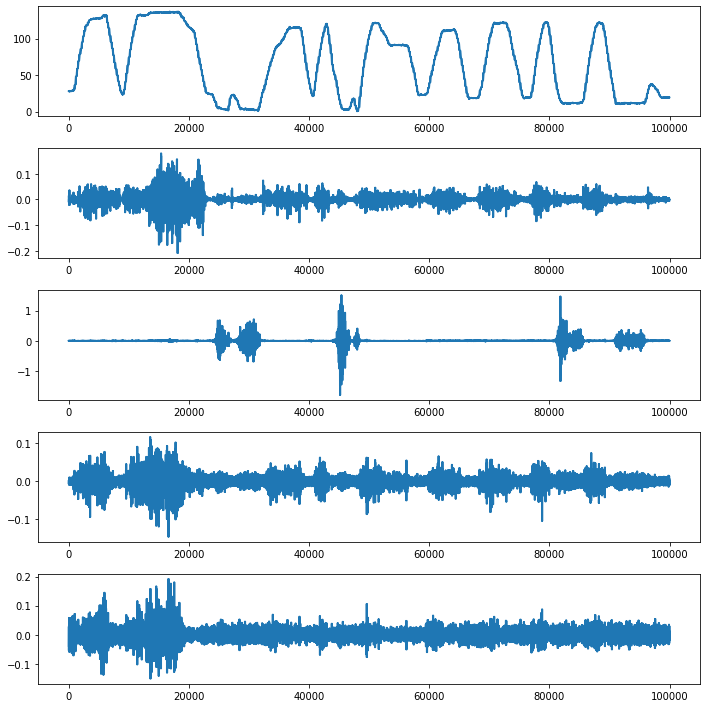

In [150]:
fig, axs = plt.subplots(5, figsize=(10,10))
fig.tight_layout()
plot_data = np.vstack(raw_data)

n = 100000

axs[0].plot(plot_data[0:n,4])
axs[1].plot(plot_data[0:n,0])
axs[2].plot(plot_data[0:n,1])
axs[3].plot(plot_data[0:n,2])
axs[4].plot(plot_data[0:n,3])

In [151]:
emg_data = maf(raw_data)
w, c = emg_data[0].shape
ch = c - 1
print(emg_data[0].shape)

(200, 5)


In [152]:
emg_data_arr = np.array(emg_data)[:,:,0:4]

X_train, X_test = train_test_split(emg_data_arr, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(11167, 200, 4)
(1241, 200, 4)


In [153]:
X_train = X_train.reshape(X_train.shape[0], w*ch)
X_test = X_test.reshape(X_test.shape[0], w*ch)
print(X_train.shape)
print(X_test.shape)

(11167, 800)
(1241, 800)


# Deep Autoencoder

In [154]:
ann_encoder = ann_encoder(64)
ann_decoder = ann_decoder(w*ch)
deep_autoencoder = autoencoder(ann_encoder, ann_decoder, (w*ch,))

In [155]:
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
deep_autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 800)]             0         
                                                                 
 Deep_encoder (Sequential)   (None, 64)                51264     
                                                                 
 Deep_decoder (Sequential)   (None, 800)               52000     
                                                                 
Total params: 103,264
Trainable params: 103,264
Non-trainable params: 0
_________________________________________________________________


In [156]:
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

deep_autoencoder.fit(X_train, X_train, epochs=100, batch_size=128, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
88/88 [==============================] - 1s 6ms/step - loss: 0.4107 - val_loss: 0.2881
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.2726 - val_loss: 0.2537
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.2307 - val_loss: 0.2073
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1838 - val_loss: 0.1616
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1492 - val_loss: 0.1373
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1344 - val_loss: 0.1283
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1288 - val_loss: 0.1251
Epoch 8/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1269 - val_loss: 0.1240
Epoch 9/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1261 - val_loss: 0.1234
Epoch 10/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1257 - val_loss: 0.1231
Epoch 11/

1/1 [==============================] - 0s 13ms/step


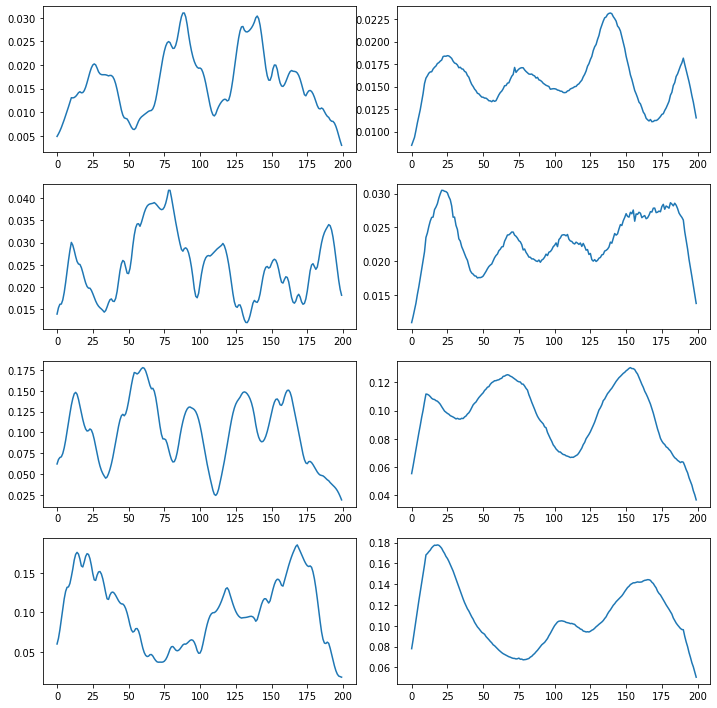

In [160]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 1

real_data = X_test.reshape(X_test.shape[0], w, ch)[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = deep_autoencoder.predict(X_test[sample,:].reshape(1, X_test.shape[1]))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])


# Convolutional Autoencoder